# ¡Hola, Aylin!  

Mi nombre es Jhoan Delgado, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

# Proyecto Integrado Sprint 6: Análisis de ventas en juegos

<h1>Introducción</h1>


Este proyecto incluye las reseñas de usuarios y expertos, los géneros, las plataformas (como lo son; Xbox, PlayStation, Nintendo) y los datos históricos sobre las ventas de juegos hasta el año en curso (2016). Se evaluarán distintos parámetros para decidir sobre qué juegos y a qué plataformas se darán solo optimizaciones y en cuales sería lo mejor para sacar los nuevos juegos del 2017 así como las mejores categorías (ESRB).

<h1>Objetivo</h1>


El objetivo de este análisis es utilizar los datos disponibles hasta el año en curso para identificar los puntos clave que podrían predecir el éxito de los videojuegos y la durabilidad que podrían tener en el mercado. Todo esto permitirá una mejor toma de decisiones para las campañas publicitarias del 2017 optimizando los recursos y maximizando las ventas.

<h1>Análisis exploratorio</h1>

En el siguiente apartado se observarán a detalle los datos con los que se está trabajando. Bajo las siguiente situaciones se realizarán cambios:
-Datos nulos

-Filas repetidas.

-Datos que impidan realizar el análisis por el formato en el que vienen.

-Datos 'TBD'

Terminado esto, se procede a revisar las ventas totales para continuar con el análisis.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Aylin, es importante que pongas una tabla de contenidos, donde expliques las diferentes secciones del proyecto, cuales son sos objetivos:
    
    - Introduccion -> De que trata el proyecto
    - Objetvos -> Que quieres llevar a cabo? Que buscas con este proyecto, cual es tu propósito. Para que lo haces?
    
Luego de esto en cada seccion debes explicar que quieres hacer y si lo lograste o no. Esto lo logro evidenciar en el desarrollo de tu codigo, pero sería genial si pudieras hacerlo de la siguiente forma, ejemplo:
    
  ### Analisis exploratorio
    En esta seccion procederemos a determinar si existen datos nulos, filas repetidas, etc.
    
            (Aqui escribes y ejecutas tu codigo python)
    
    Como se puede observar, tenemos 300 Na's, filas repetidas por lo que eliminamos las repetidas y reemplazamos por 0 como metodo de imputacion.
    
En el ejemplo anterior que te muestro, ayuda a tener algo mas estructurado y ordenado al momento de presentar tus soluciones y llevar al lider de proyecto/cliente de la mano para ver como desarrollaste todo paso a paso.
    
Solo debes corregir esto y tu proyecto será aprobado
    

  
</div>

<h2>Importación de librerías</h2>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
games = pd.read_csv('/datasets/games.csv')
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<span style='color:green'> Se ve de manera general con el uso .head(), .describe() e info() un panorama general de los datos con los que se cuenta </span>

In [4]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen uso de los metodos de exploracion y de string para volver minuscula las columnas
</div>

<span style='color:green'> En el caso de la columna 'user_score' se cambia a float ya que está en object (tiene números) </span>

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<h2>Conversión de columnas y llenado de valores ausentes</h2>



<h3>Conversión de year</h3>
Se revisan los valores ausentes en todo el Dataframe para verificar al mismo tiempo donde se necesitan hacer cambios y se trabaja sobre las columnas; year_of_release, 

In [6]:
games['year_new'] = pd.to_datetime(games['year_of_release'], format= '%Y')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-01-01
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01


<span style='color:green'> Se cambia el formato de la fecha a uno más adecuado </span>

<span style='color:green'> En el caso de la columna 'user_score' decido cambiarlo más adelante en el trabajo de valores ausentes ya que tendréque ver que hago con los valores 'tbd' porque no puedo convertir directamente esta columna con .astype(float)</span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buena estrategia!
</div>

In [7]:
games.isna().sum().sort_index()

critic_score       8578
eu_sales              0
genre                 2
jp_sales              0
na_sales              0
name                  2
other_sales           0
platform              0
rating             6766
user_score         6701
year_new            269
year_of_release     269
dtype: int64

<h3>Valores ausentes en year_new</h3>

In [8]:
games_year_na = games[games['year_new'].isna()]
games_year_by_genre = games_year_na.groupby('platform')['year_new'].value_counts(dropna=False)
games_year_by_genre

platform  year_new
2600      NaT         17
3DS       NaT          8
DS        NaT         30
GB        NaT          1
GBA       NaT         11
GC        NaT         14
N64       NaT          3
PC        NaT         17
PS        NaT          7
PS2       NaT         34
PS3       NaT         25
PSP       NaT         16
PSV       NaT          1
Wii       NaT         34
X360      NaT         30
XB        NaT         21
Name: year_new, dtype: int64

<span style='color:green'> Aunque mucho valores ausentes son de PS2 o Wii, por la cantidad de datos que son 269 decido no rellenarlos ya que son de distintas consolas de distintos años y muy probablemente aunque buscara por nombre de la consola el año verdadero que le corresponde, este numero de valores ausentes no representa una cantidad que pueda afectar a mis cálculos más adelante.  </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien pensado, en este caso no es un numero significativo con respecto a la muestra por lo que puedes hacerles drop
</div>

<h3>Valores ausentes en 'genre'</h3>
Como vimos en el análisis de los datos unos pasos arriba en esta columna, se tienen datos ausentes y se les puede asignar un género de acuerdo a la moda de su genero agrupandolos por la plataforma donde los juegos fueron clasificados. Siguiendo los siguientes pasos:

-Calcular la moda de 'genre' de acuerdo a su clasificacion

-Creación de un diccionario para darle seguimiento a cada plataforma

-Creación de una función la cual rellenará los valores ausentes y de tener un valor asignado lo dejará de la misma forma.

-Se utiliza la función creada sobre la columna 'genre'

-Se comprueba con una línea de código que no haya valores ausentes sobre la columna trabajada.


In [9]:
# Se calcula la moda de 'genre' para cada plataforma
genre_mode_by_platform = games.groupby('platform')['genre'].apply(pd.Series.mode).reset_index()

#Se crea un diccionario para darle seguimiento a cada plataforma con su moda de 'genre'
genre_mode_dict = genre_mode_by_platform.groupby('platform')['genre'].first().to_dict()

def fill_genre(row):
    if pd.isna(row['genre']):
        return genre_mode_dict.get(row['platform'], 'Unknown') 
    return row['genre']

games['genre'] = games.apply(fill_genre, axis=1)
print(games['genre'].isna().sum()) 


0


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buena estrategia de imputacion por la media, como te decia arriba, debes explicar que querias hacer aqui para darle mas claridad al lector
</div>

<h3>Valores ausentes en 'user_score'</h3>

Para trabajar esta columna, se realiza un trabajo integral donde se utiliza una nueva que se añade a continuación al DF original llamada 'total_sales'. Para el relleno de esta columna se necesitan ver los parámetros de la columna creada y con esta información a través de la una función se hará el llenado de los valores ausentes. Siguiendo los siguientes pasos:

-En este caso, la columna contiene en una columna numérica datos tipo string que son los 'tbd', así que para no afectar el cálculo de momento de se ponen con valores '0'. 

-Para el llenado de las ausencias primero se hace una columna nueva llamada 'sales_category' con la info de las ventas totales y se ocupará para la primera función que es justamente categorizar las ventas para poder asignarles un valor alto, medio o bajo de las mismas.

-Se ocupa una segunda función que se encarga de asignar estos promedios a una nueva columna 'user_score_new'.
-Se usa la función en la columna que tiene los valores ausentes y finalmente se comprueba con .isna() que no haya valores ausentes.

-Para los valores 'tbd' se decide usar un valor -1, que reemplaza el valor '0' asignado en un principio solo para trabajar esta columna.

In [10]:
#Ventas totales
games['total_sales'] = games['eu_sales'] + games['jp_sales']+  games['na_sales'] + games['other_sales'] 
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-01-01,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01,31.38


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien la suma y creacion de una nueva columna. Pero como te menciono arriba, por que haces esto? debes explicar para llevar con un hilo conductor al lector
</div>

In [11]:
#Para ver los parámetros para la siguiente función
games['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [12]:
#Manejo de valores 'tbd'
games['user_score_new'] = games['user_score'].replace('tbd', 0)

games['user_score_new'] = games['user_score_new'].astype(float)


<span style='color:green'> En este caso esta columna como tiene valores tbd que por alguna razon ya sea por que el programa no hizo correctamente el trabajo, se está actualizando etc, los pone como ese tipo de valores pero no quiere decir que son valores nulos como en otras columnas, así que opto primero por ponerle un valor '0' para realizar los siguiente cálculos, pero le pondré un '-1' al terminarlos para diferenciarlos.  </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buena estrategia, son valores que estan por determinarse
</div>

In [13]:
#Categorizacion de ventas
games['sales_category'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [14]:
#Relleno de valores ausentes en la columna de 'user_score_new'
def sorted_by_category(ventas):
    if ventas > 3:
        return 'high_sales'
    elif ventas > 0.5:
        return 'medium_sales'
    else:
        return 'low_sales'

#Se crea la nueva columna
games['sales_category'] = games['sales_category'].apply(sorted_by_category)

# Promedio de 'user_score_new' por género y sales_category
mean_user_score = games.groupby(['genre', 'sales_category'])['user_score_new'].mean()

def fill_score(row):
    if pd.isna(row['user_score_new']):
        return mean_user_score.get((row['genre'], row['sales_category']), row['user_score_new'])
    return row['user_score_new']


games['user_score_new'] = games.apply(fill_score, axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new,total_sales,user_score_new,sales_category
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01,82.54,8.000000,high_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-01-01,40.24,8.277273,high_sales
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,35.52,8.300000,high_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01,32.77,8.000000,high_sales
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01,31.38,7.885714,high_sales


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien pero lo que te digo, cual es el proposito de ello, creo que te falta explicarle al lector cual es tu idea y que quieres lograr. No solo basta con comentarios del codigo, sino complementar escrbiendo que quieres lograr o porque haces ello con que proposito
</div>

In [15]:
#Volvemos a poner los tbd con el valor -1
games['user_score_new'] = games['user_score_new'].replace(0,-1)

In [16]:
games['user_score_new'].isna().sum()

0

<h3>Valores ausentes en 'name'</h3>
Al ser un número reducido de valores ausentes y por ser categórico, se procede a hacer un llenado de los valores ausentes con 'Unknown'

In [17]:

#Valores ausentes en columna 'name'
nan_rows = games[games['name'].isna()]
nan_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new,total_sales,user_score_new,sales_category
659,NaN,GEN,1993.0,Platform,1.78,0.53,0.00,0.08,NaN,NaN,NaN,1993-01-01,2.39,7.059615,medium_sales
14244,NaN,GEN,1993.0,Platform,0.00,0.00,0.03,0.00,NaN,NaN,NaN,1993-01-01,0.03,4.734190,low_sales


In [18]:
#Se reemplazan con 'Unknown'
games['name'] = games['name'].fillna('Unknown')

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16715 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  float64       
 3   genre            16715 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
 11  year_new         16446 non-null  datetime64[ns]
 12  total_sales      16715 non-null  float64       
 13  user_score_new   16715 non-null  float64       
 14  sales_category   16715 non-null  objec

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen manejo para estos valores nulos
</div>

<h3>Valores ausentes en 'critic_score'</h3>

Por seguridad, nuevamente crearemos una nueva columna con la información que contiene todos los datos (incluídos los ausentes). Se realiza lo siguiente:

-Se crea una nueva columna que servirá para clasificar las ventas en base ahora a sus críticas por profesionales dando la nueva columna llamada ''sales_category_for_cs'

-Se aplica la función creada

-Se hace un promedio de 'critic_score_new' agrupado por las columnas 'genre' y 'sales_category_for_cs' y a su vez se crea otra función para asignar este promedio y de tener ya tener la información se deja así.

-Se aplica la función a la columna 'critic_score_new' 

-Se comprueba que no haya ningún valor ausente.

In [20]:
#Valores ausentes en la columna 'critic_score'

games['critic_score_new'] = games['critic_score']
games['sales_category_for_cs'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
def sorted_by_cat(ventas):
    if ventas > 85:
        return 'high_sales'
    elif ventas > 50:
        return 'medium_sales'
    else:
        return 'low_sales'

#Se crea la nueva columna
games['sales_category_for_cs'] = games['sales_category_for_cs'].apply(sorted_by_cat)

# Promedio de'critic_score' por género y sales_category
mean_critic_score = games.groupby(['genre', 'sales_category'])['critic_score_new'].mean()

def fill_critic_sco(row):
    if pd.isna(row['critic_score_new']):
        return mean_critic_score.get((row['genre'], row['sales_category']), row['critic_score_new'])
    return row['critic_score_new']


games['critic_score_new'] = games.apply(fill_critic_sco, axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new,total_sales,user_score_new,sales_category,critic_score_new,sales_category_for_cs
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01,82.54,8.000000,high_sales,76.000000,medium_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-01-01,40.24,8.277273,high_sales,87.045455,low_sales
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,35.52,8.300000,high_sales,82.000000,low_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01,32.77,8.000000,high_sales,80.000000,low_sales
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01,31.38,7.885714,high_sales,88.571429,low_sales


In [21]:
games['critic_score_new'].isna().sum()

0

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien, solo te falta explicar en tus palabras, guiar al lector
</div>

<h3>Valores ausentes en 'rating'</h3>

-Por seguridad, nuevamente crearemos una nueva columna con la información que contiene todos los datos (incluídos los ausentes). Se realiza lo siguiente:

-En una variable se almacena la moda de 'rating' agrupada por la plataforma.

-Se crea un diccionario para poder trabajarlo en la función y ya almacena la info necesaria para hacer el llenado.

-Se hace la función donde se llena con la moda ya que es una variable categórica y se debería de encontrar un valor que se repite con frecuencia y tendría más sentido el llenado. De no encontrar esa moda, los valores se llenan con un 'Unknown' ya que en esta columna había muchos datos ausentes.

-Se aplica la función a la columna 'rating_new' 

-Se comprueba que no haya ningún valor ausente.

In [22]:
#Valores ausentes en la columna 'rating'

games['rating_new'] = games['rating']
# Se calcula la moda de 'rating' para cada plataforma
rating_mode_by_platform = games.groupby('platform')['rating'].apply(pd.Series.mode).reset_index()

#Se crea un diccionario para darle seguimiento a cada plataforma con su moda de rating
rating_mode_dict = rating_mode_by_platform.groupby('platform')['rating'].first().to_dict()

def fill_rating(row):
    if pd.isna(row['rating']):
        return rating_mode_dict.get(row['platform'], 'Unknown') 
    return row['rating']


games['rating_new'] = games.apply(fill_rating, axis=1)
print(games['rating_new'].isna().sum())  


0


In [23]:
games_un = games[games['rating_new'] == 'Unknown']
games_un

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new,total_sales,user_score_new,sales_category,critic_score_new,sales_category_for_cs,rating_new
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985-01-01,40.24,8.277273,high_sales,87.045455,low_sales,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01,31.38,7.885714,high_sales,88.571429,low_sales,Unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,1989-01-01,30.26,8.425000,high_sales,83.000000,low_sales,Unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,1984-01-01,28.31,6.941270,high_sales,84.737705,low_sales,Unknown
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,1999-01-01,23.09,7.885714,high_sales,88.571429,low_sales,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15655,Super Dodge Ball,NG,1995.0,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,1995-01-01,0.02,4.332823,low_sales,67.903646,low_sales,Unknown
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994.0,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,1994-01-01,0.02,4.332823,low_sales,67.903646,low_sales,Unknown
16207,Rock N' Roll Racing,SNES,1993.0,Racing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,1993-01-01,0.01,4.501988,low_sales,65.199241,low_sales,Unknown
16693,PGA European Tour,N64,2000.0,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2000-01-01,0.01,4.332823,low_sales,67.903646,low_sales,Unknown


<span style='color:green'> En este caso como decidí calcular la moda de 'rating' para cada plataforma y lo demás lo pusiera como 'Unknown' y a raíz de esto, solo me quedaron 1120 juegos que quedarían bajo este nombre de rating, más de la mitad se les asignó bajo esos lineamientos ya que de principio solo habían 9949, y de esta forma se llenaron los valores ausentes  </span>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien, pero por que decidiste usar la moda? Seria bueno explicarlo
</div>

In [24]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   16715 non-null  object        
 1   platform               16715 non-null  object        
 2   year_of_release        16446 non-null  float64       
 3   genre                  16715 non-null  object        
 4   na_sales               16715 non-null  float64       
 5   eu_sales               16715 non-null  float64       
 6   jp_sales               16715 non-null  float64       
 7   other_sales            16715 non-null  float64       
 8   critic_score           8137 non-null   float64       
 9   user_score             10014 non-null  object        
 10  rating                 9949 non-null   object        
 11  year_new               16446 non-null  datetime64[ns]
 12  total_sales            16715 non-null  float64       
 13  u

<span style='color:green'> Los unicos valores ausentes que decidi no llenar fueron los asignados a fechas ya que estos son bastante distintos entre sí. Los que pertenecen a critic_score y user_score los llené en base a las ventas ya que es un buen indicativo para llenarlas y más con un promedio a través de una función que pueda encasillarlos. En el rating me fue un poco más complicado decidir sobre qué columna trabajar, porque como es una columna descriptiva se tenía que trabajar con algo más, pero considero que los valores fueron llenados con éxito </span>

<h2> Verificación de duplicados general </h2>

In [25]:
games.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien, siempre es bueno aseguarase
</div>

# Análisis de los datos


<h2>Juegos lanzados en diferentes años</h2>

Hay que analizar los datos en general en un gráfico para tener ahora un panorama general pero con algo visual para que a pesar de la cantidad de datos, nos sea más fácil saber con qué trabajar y no afectar nuestro análisis a futuro.
Si se visualizan datos históricos muy viejos lo mejor será prescindir de ellos, no sin antes visualizar que la cantidad sea mínima y recordar que la campaña que lanzaremos será para nuestro 2017.

<AxesSubplot:xlabel='year_new'>

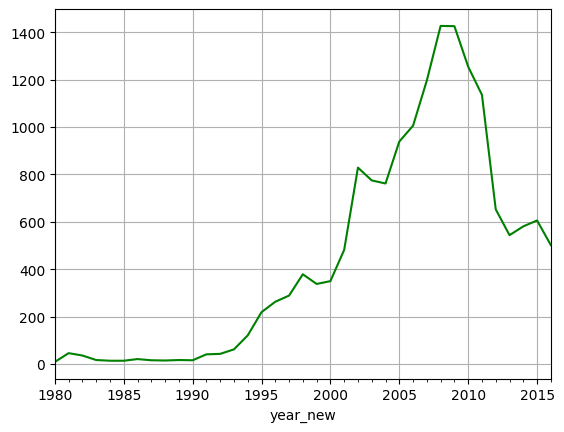

In [27]:
games.groupby('year_new')['name'].count().plot(kind='line', color='green', grid=True)

<span style='color:green'> Como se aprecia en el gráfico o mejor sería ya no tomar en cuenta los datos de juegos que sean de antes del año 1993 ya que hay varios factores a tomar en cuenta; ya son muy viejos y probablemente ya no se jueguen en consolas actuales y que el mercado al que nos queremos dirigir ni siquiera conozca sobre ello y si los conoces ya no sea la versión que se juega en la actualidad </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen analisis del grafico
</div>

In [28]:
games.query("year_new <= '1993-01-01'").shape

(367, 18)

<span style='color:green'> Eliminaré estos 367 datos ya que no son importantes para cálculos futuros </span>

In [29]:
games = games.drop(games[games['year_new'] <= '1993-01-01'].index)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new,total_sales,user_score_new,sales_category,critic_score_new,sales_category_for_cs,rating_new
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01,82.54,8.000000,high_sales,76.000000,medium_sales,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,35.52,8.300000,high_sales,82.000000,low_sales,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01,32.77,8.000000,high_sales,80.000000,low_sales,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01,31.38,7.885714,high_sales,88.571429,low_sales,Unknown
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006-01-01,29.80,8.500000,high_sales,89.000000,low_sales,E


In [30]:
games.shape

(16348, 18)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buena estrategia, son juegos bastante antiguos
</div>

<h2>Top 10 de plataformas con las mayores ventas</h2>

In [31]:
#Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 
#Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
top10_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top10_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
3DS      259.00
Name: total_sales, dtype: float64

<span style='color:green'> Aquí visualizamos el top 10 de las plataformas de forma descendente con sus ventas en dólares </span>

<h2>Tabla dinámica con el Top 10 de plataformas basado en ventas</h2>

-Se construye un gráfico en el que se pueden visualizar las 10 plataformas con mayores ventas a través del tiempo a la actualidad. 
-Se espera ver cual de ellas a la fecha tiene ventas


In [32]:
top10_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index
top10_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS'], dtype='object', name='platform')

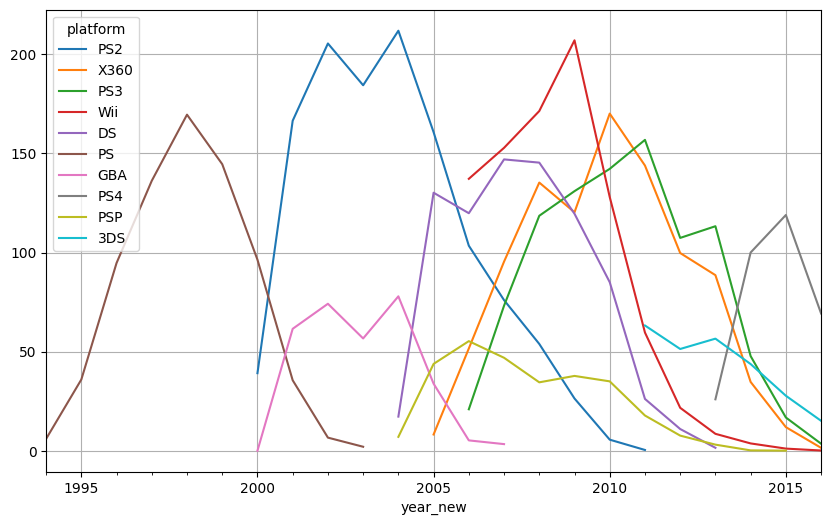

In [33]:
pivot_games = games.pivot_table(
    index='year_new',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

pivot_top10= pivot_games[top10_platforms].plot(kind='line', figsize=(10,6), grid=True)

<h2>Boxplot del Top 10 de Plataformas</h2>

En el siguiente gráfico veremos a detalle dónde es que están concentrados los datos más importantes de estas 10 plataformas, incluídas sus ventas promedio.

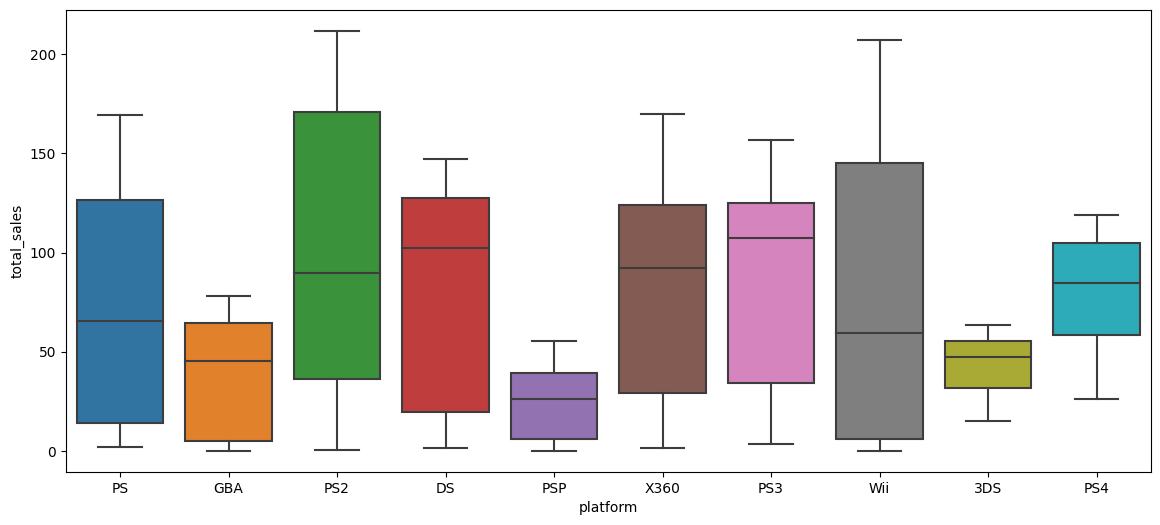

In [34]:
#Distribucion por año
filtered_games = games.query("year_new > '1993-01-01'")
grouped_games= filtered_games.groupby(['year_new','platform'])['total_sales'].sum().reset_index()
games_top10 = grouped_games[grouped_games['platform'].isin(top10_platforms)]
plt.figure(figsize= (14,6))
sns.boxplot(data= games_top10, x= 'platform', y='total_sales')

plt.show()

<span style='color:purple'> Aquí entiendo que es mucho más estético usar seaborn para las gráficas, pero por ejemplo con Pandas vi en un ejemplo que al graficar tenia más valores atípicos e incluso se ocupa plt.ylimit() para poder visualizar el boxplot por tantos outliers. Entonces como en este caso, qué conviene aplicar más? con pandas o con seaborn un boxplot? cuál dará mejor información a cliente? </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Tanto Seaborn como Pandas tienen sus ventajas al crear boxplots, y la elección depende de tus necesidades específicas. Seaborn ofrece una estética más atractiva por defecto y maneja los outliers de manera eficiente, lo que puede resultar en visualizaciones más claras y efectivas para presentar a un cliente. Por otro lado, Pandas permite una flexibilidad mayor en la manipulación de datos y puede ser útil para análisis más profundos, aunque a veces muestra más outliers por defecto. En general, si tu prioridad es la presentación visual y la claridad de la información, Seaborn sería la mejor opción, pero si necesitas un análisis más detallado, podrías considerar usar Pandas y ajustar los límites según sea necesario.
</div>

<h2>Análisis de los juegos a través de los años y las familias más importantes</h2>

Se necesita tener un panorama general para ver que tanto han cambiado las ventas con todos los juegos (aun cuando ya no tenga ventas) y ver si alguna plataforma está presente en la actualidad.

<AxesSubplot:xlabel='year_new'>

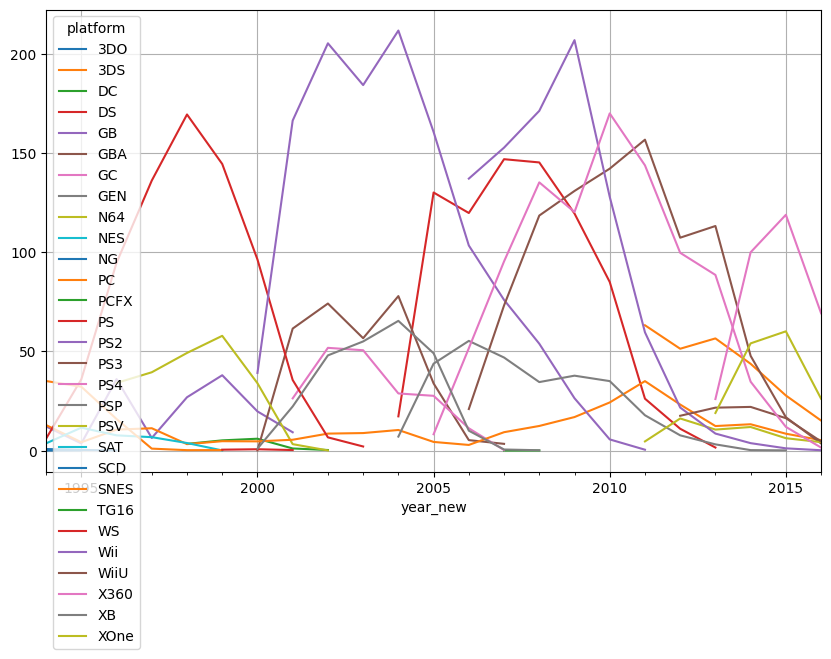

In [35]:
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
pivot_games_all = games.pivot_table(
    index='year_new',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

pivot_games_all.plot(kind='line', figsize=(10,6), grid=True)

<span style='color:green'> Las consolas GB, GBA y DS son las que al menos para el 3 fueron las mejores vendidas en sus años y partiendo del 2003 hacia atrás la única que a la fecha conserva ventas (muy bajas, pero las tiene) es la PC. </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen analisis
</div>

<h3>Familia Xbox</h3>

Agrupamos las consolas que correspondan a esta familia y analizamos sus ventas por plataforma para ver su comportamiento en el tiempo y si tiene ventas actuales.

<AxesSubplot:xlabel='year_new'>

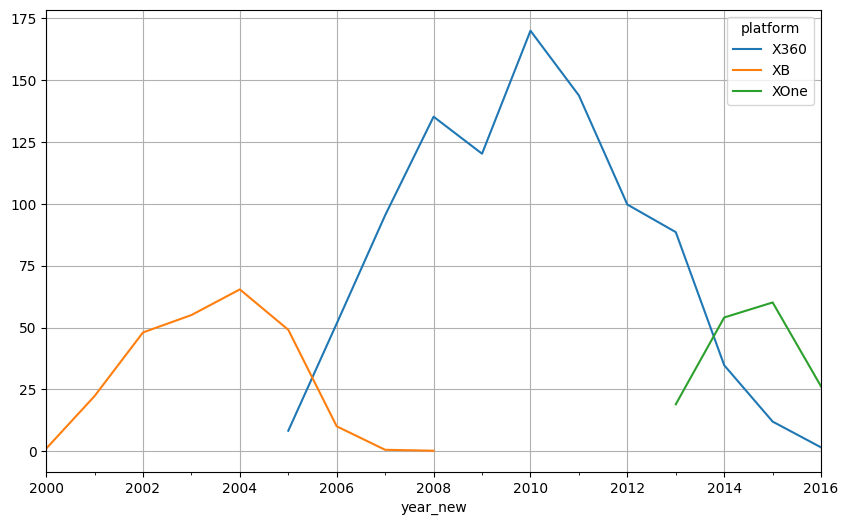

In [36]:

xbox_platform =["XB", "X360", "XOne"]
games[games['platform'].isin(xbox_platform)].pivot_table(
    index='year_new',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(kind='line', figsize=(10,6), grid=True)

<span style='color:green'> En el caso de la familia de Xbox 8 años duraron sus ventas y 3 antes salió la nueva. En X360 sus ventas duraron 11 años y 3 antes sale la nueva. El XboxOne sale en 2013 y a la fecha tiene ventas, pero sus ventas han sido menores a comparación de las otras. El Xbox y el X360 su punto en comun es que 3 años después de la salida de la nueva consola las ventas bajan a 0.  </span>

<h3>Familia PlayStation</h3>

Agrupamos las consolas que correspondan a esta familia y analizamos sus ventas por plataforma para ver su comportamiento en el tiempo y si tiene ventas actuales.

<AxesSubplot:xlabel='year_new'>

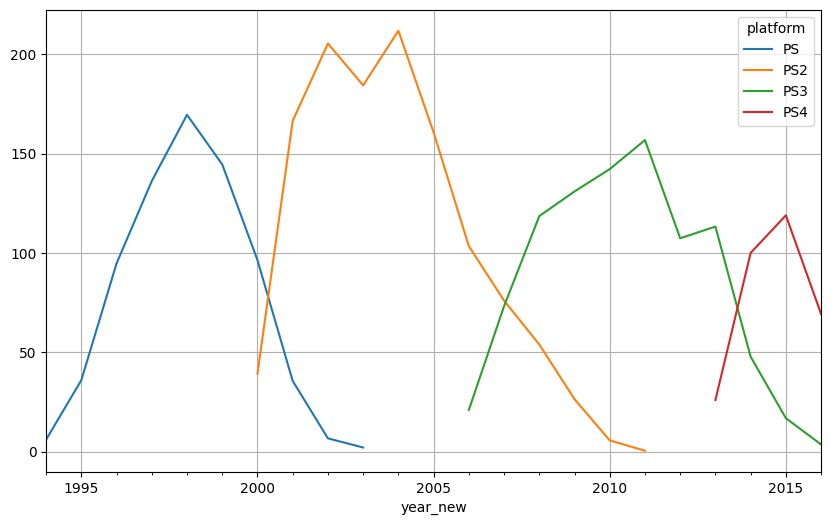

In [37]:
ps_platform = ["PS", "PS2", "PS3", "PS4"]
games[games['platform'].isin(ps_platform)].pivot_table(
    index='year_new',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(kind='line', figsize=(10,6), grid=True)

<span style='color:green'> Para la familia PS; la consola PS duró en total 9 años de los cuales solo 3 más después de la siguiente consola. La PS2 duró 11 años en total y de los cuales solo 5 más después de la siguiente consola. La PS3 duró 10 años en total y de los cuales solo 3 más después de la siguiente consola. La última sigue vigente desde 2013 y sus ventas fueron menores que las anteriores </span>

<h3>Familia PlayStation Portátil</h3>

Agrupamos las consolas que correspondan a esta familia y analizamos sus ventas por plataforma para ver su comportamiento en el tiempo y si tiene ventas actuales.

<AxesSubplot:xlabel='year_new'>

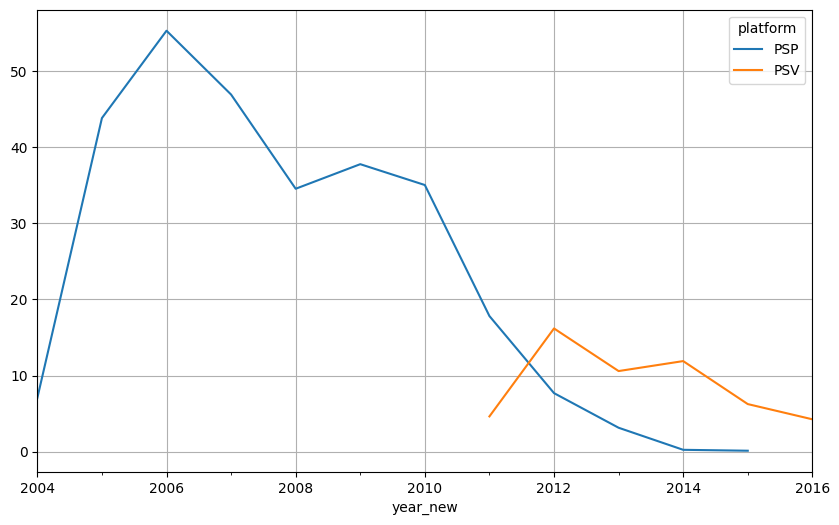

In [38]:
ps_portatil= ["PSP", "PSV"]
games[games['platform'].isin(ps_portatil)].pivot_table(
    index='year_new',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(kind='line', figsize=(10,6), grid=True)

<span style='color:green'>  </span>

<span style='color:green'> Para la familia PS portátil; el PSP estuvo 15 años, una de las más duraderas pero al mismo tiempo no tuvo tantas ventas como Xbox o incluso PS2. Y la PSV tiene 5 años en el mercado pero definitivamente por ventas ya no es la favorita del mercado. </span>

<h3>Familia Nintendo</h3>

Agrupamos las consolas que correspondan a esta familia y analizamos sus ventas por plataforma para ver su comportamiento en el tiempo y si tiene ventas actuales.

<AxesSubplot:xlabel='year_new'>

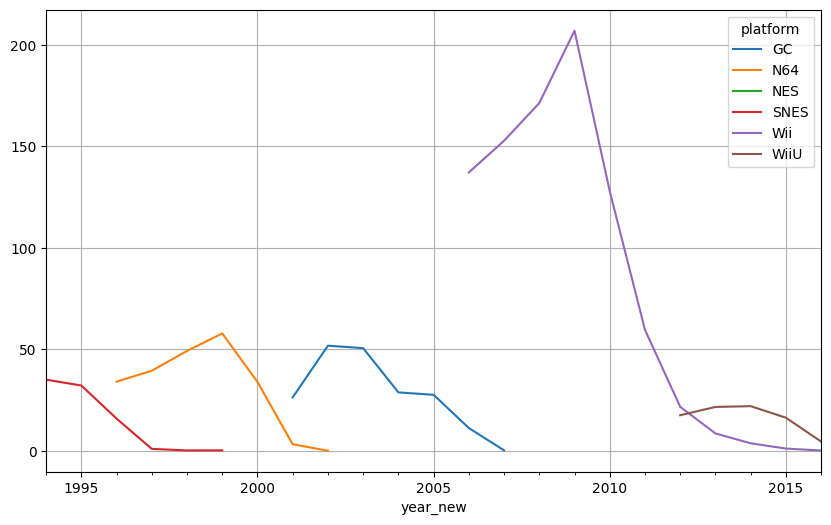

In [39]:
nintendo_platform = ["NES", "SNES", "N64", "GC", "Wii", "WiiU"]
games[games['platform'].isin(nintendo_platform)].pivot_table(
    index='year_new',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(kind='line', figsize=(10,6), grid=True)

<span style='color:green'> Para la familia Nintendo; Es una familia de consolas que es de lás más viejas que hay en el mercado y la SNES, N64, GC a pesar de que son representativas solo sobrepasaron los 50millones de dolares, y probablemente se hizo una campaña publitaria con el área de marketing y características novedosas para la con sola de Wii ya que el despunte en las ventas es totalmente notorio del 2008 en adelante las ventas fueron a la baja. Y también, la siguiente consola fue bastante parecida ya y no convenció tanto al público ya que las no llegan a los 30 </span>

<h3>Familia Nintendo Portátil</h3>

Agrupamos las consolas que correspondan a esta familia y analizamos sus ventas por plataforma para ver su comportamiento en el tiempo y si tiene ventas actuales.

<AxesSubplot:xlabel='year_new'>

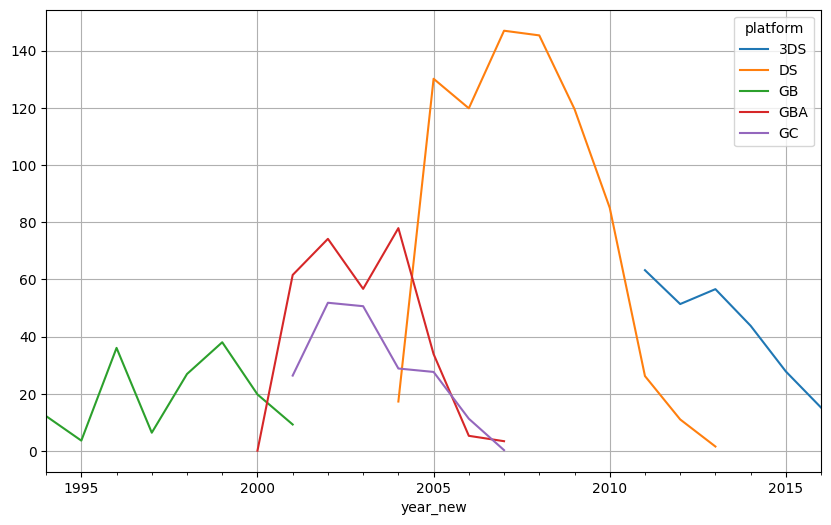

In [40]:

nintendo_port_platform= ['GB', 'GC', 'GBA', 'DS', '3DS']
games[games['platform'].isin(nintendo_port_platform)].pivot_table(
    index='year_new',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(kind='line', figsize=(10,6), grid=True)

<span style='color:green'> Para la familia Nintendo portatil; Las consolas GB, GBA, y GC tuvieron ventas constantes y ese trío duro 7 años en sus respectivos años, pero el DS igualmente para esos años fue un producto novedoso y se nota en las altas ventas de esos años. Y le paso algo similiar que a Wii con la siguiente generación, que su siguiente consola no tuvo tantas ventas pero definitivamente le fue mucho mejor a comparacion de el WiiU </span>

<span style='color:green'> De acuerdo a las gráficas tarda un año y medio en desaparecer las ventas de la consola anterior, no es regla porque en algunos casos como este ultimo ejemplo del nintendo portable, lanzaron 2 solo con un año de diferencia y aunque afectó a las ventas, se siguió vendiendo y aun cuando salió una siguiente consola, las ventas de esas 2 anteriores no 'murieron' hasta 3 años después </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buenos analisis, excelente Aylin, sigue asi!!!
</div>

<h2>Determinación de los datos totales a trabajar</h2>

En datos anteriores se realizó la filtración de datos, así que aqui visualizaremos la cantidad exacta de datos a trabajar

In [41]:
print(f'Los datos con los que se trabajarán son los siguientes: {games.shape}')

Los datos con los que se trabajarán son los siguientes: (16348, 18)


<span style='color:green'> Estos datos los había limpiado más arriba para analizar los demás datos ya que como mencionaba, tomar los datos más antiguos no revelarían informacion relevanta para la campaña que se pretende para el 2017, así que se dejaron los datos de 1994 en adelante. </span>

<h3>Plataformas líderes en ventas a través de los años</h3>

Agrupamos las consolas por plataforma y hacemos el conteo por año para visualizar en cual se podrían enfocar los desarrolladores de juegos

In [42]:
games.groupby('platform')['year_new'].nunique().sort_values(ascending=False)

platform
PC      23
PS2     12
X360    12
PSP     12
Wii     11
PS3     11
DS      10
PS      10
XB       9
GB       8
GBA      8
GC       7
DC       7
N64      7
PSV      6
3DS      6
SNES     6
SAT      6
WiiU     5
XOne     4
PS4      4
WS       3
NG       3
3DO      2
SCD      1
TG16     1
PCFX     1
NES      1
GEN      1
2600     0
Name: year_new, dtype: int64

<span style='color:green'> De acuerdo a los gráficos y la info, definitivamentela PC es la consola donde sus ventas no tuvo picos grandes como lo han sido las demás pero es la más estable en el mercado y lleva 23 así que veo que es el mercado donde principalmente lso desarroladores deberían de optimizar los juegos y el área de marketing hacer su mayor compaña publicitaria. Las consolas PS2, X360 y PSP a pesar de que estuvieron mucho tiempo en el mercado hoy en día ya no venden nada, ahí no pondría ningún recurso como primer movimiento, probablemente por ejemplo a los meses de lanzados juegos (y de los más jugados/comprados) optimizarlos para el X360. A la consola que le invertiría recursos definitivamente seria a PS4 Y XboxOne ya que son las consolas más actuales y que tienen ventas a la fecha.</span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien, excelente analisis
</div>

<h2>Boxplot de las plataformas para ventas globales </h2>

De acuerdo a nuestro top 10 de plataformas se hace el análisis, basado en sus ventas

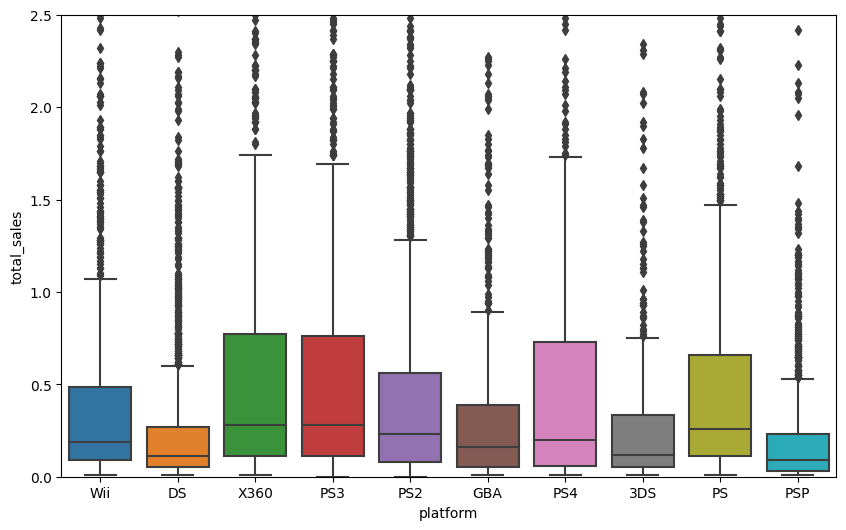

In [43]:
#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.
#¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? 
#Describe tus hallazgos.


filtered_games_top = filtered_games[filtered_games["platform"].isin(top10_platforms)]
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=filtered_games_top, x="platform", y="total_sales")


plt.ylim(0, 2.5)
plt.show()




<h3>Gráfico de barras: Promedio de ventas del Top 10</h3>

Visualizamos de otra forma en la que puede ser más digerible la información sobre le promedi ode ventas de las plataformas

<AxesSubplot:xlabel='platform'>

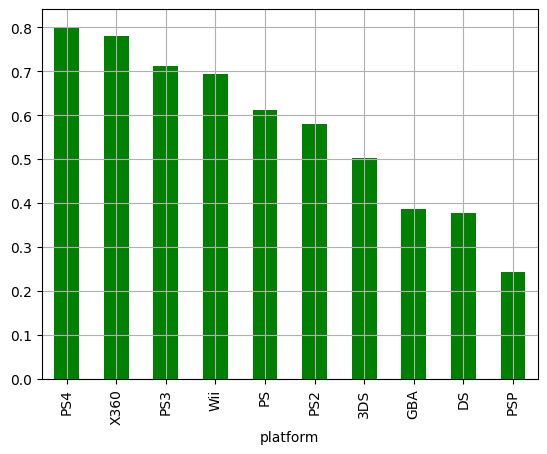

In [44]:
(
    filtered_games[filtered_games["platform"].isin(top10_platforms)]
    .groupby('platform')['total_sales']
    .mean()
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True, color='green')
)

<span style='color:green'> Viendo las ventas promedio, no varían tanto de manera global si hablamos de las primeras 7 consolas, porque de ahí en fueran su promedio puede variar bastante, y con respecto a su promedio definitivamente PS4 Y X360 llevan las mejores ventas y las 3 restantes a pesar de que en un marco general tienen mejor promedio que varias que no aparecen aquí en la actualidad ya no se les venden videojuegos </span>

<h2>Relación entre ventas vs reseñas de usuarios: X360 </h2>

Se crea un gráfico de dispersion para visualizar si existe o no una relación

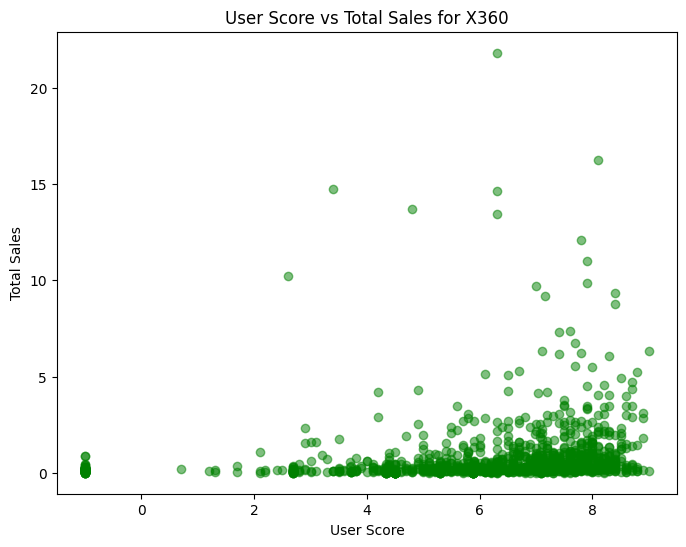

In [45]:
#Elijo la plataforma 'X360' por sus buenas ventas

#La relacion entre las ventas y las reseñas de usuarios
x360 = games[games['platform'] == 'X360']

plt.figure(figsize=(8,6))
plt.scatter(x360['user_score_new'], 
            x360['total_sales'], 
            c='green',
            alpha=0.5
           )
plt.title('User Score vs Total Sales for X360')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()

<h2>Relación entre ventas vs reseñas de profesionales: X360 </h2>

Se crea un gráfico de dispersion para visualizar si existe o no una relación

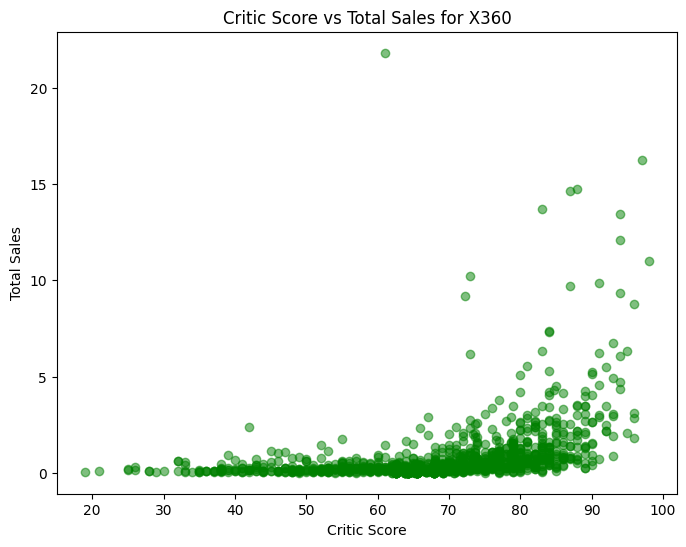

In [46]:
#La relacion entre las ventas y las reseñas de profesionales
x360 = games[games['platform'] == 'X360']

plt.figure(figsize=(8,6))
plt.scatter(x360['critic_score_new'], 
            x360['total_sales'], 
            c='green',
            alpha=0.5
           )
plt.title('Critic Score vs Total Sales for X360')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

<h2>Correlación de las reseñas: X360 </h2>

En base a cálculos se dan resultados para saber si existe la correlación en ambos gráficos pero ahora en datos

In [47]:
corr_user_sales = x360[['user_score_new', 'total_sales']].corr().iloc[0, 1]
corr_critic_sales = x360[['critic_score_new', 'total_sales']].corr().iloc[0, 1]

print(f"Correlación entre User Score y Total Sales: {corr_user_sales}")
print(f"Correlación entre Critic Score y Total Sales: {corr_critic_sales}")

Correlación entre User Score y Total Sales: 0.18937683433822997
Correlación entre Critic Score y Total Sales: 0.4048793182181384


<span style='color:green'> Aunque los gráficos se pudieran ver aparentemente un tanto parecidos, al analizarlos son diferentes. Por los resultados de ambas correlaciones podemos concluir que los compradores por la baja correlacion entre las reseñas de usuario vs ventas no basan esta compra sino en la crítica de profesionales que testean los juegos y proporcionan sus opiniones. Por lo que es importante la distribucion de los juegos a estos críticos probablemente antes para que puedan emitir sus reseñas y se puedan publicar poco antes del lanzamiento oficial de los juegos en la campaña de marketing </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien
</div>

<h2>Juego más popular en distintas plataformas </h2>

Para nuestra campaña publicitaria se necesita saber cual juego es el más popular en distintas pltaformas para darle difusión.

In [48]:
#Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
games.groupby(['name'])['platform'].nunique().sort_values(ascending=False)

name
Need for Speed: Most Wanted            10
LEGO Marvel Super Heroes                9
Ratatouille                             9
Madden NFL 07                           9
FIFA 14                                 9
                                       ..
Inazuma Eleven GO Strikers 2013         1
Inazuma Eleven Go 2: Chrono Stone       1
Inazuma Eleven Strikers                 1
Inazuma Eleven Strikers 2012 Xtreme     1
¡Shin Chan Flipa en colores!            1
Name: platform, Length: 11251, dtype: int64

<h3> Need for Speed: Most Wanted </h3>

Debido a los resultados, este juego se analizará de acuerdo a sus ventas y ver si está presente en la consola que hay ventas actuales que es la PS4

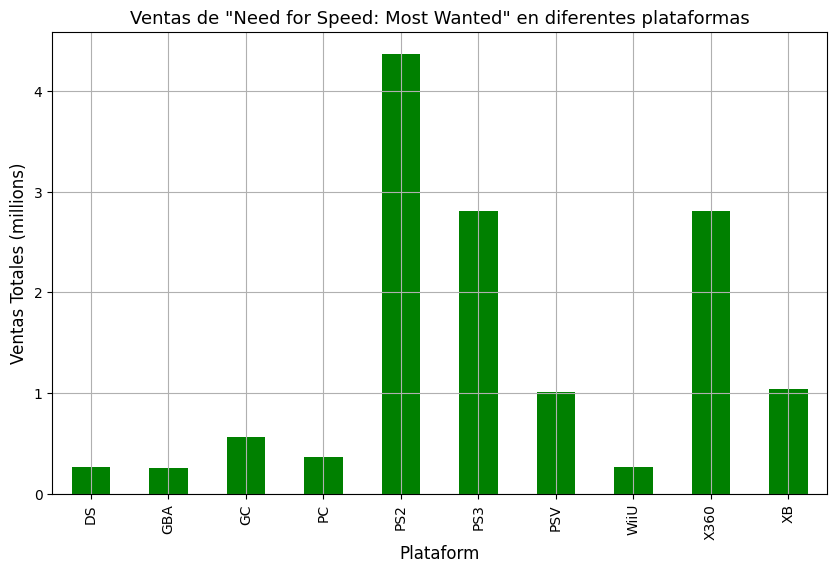

In [49]:
need_for_speed = games[games['name'] == 'Need for Speed: Most Wanted']

# Se agrupa por plataforma y se suman las ventas de ese juego en las diferentes plataformas
sales_by_platform = need_for_speed.groupby('platform')['total_sales'].sum()

plt.figure(figsize=(10,6))
sales_by_platform.plot(kind='bar', color='green', grid=True)
plt.title('Ventas de "Need for Speed: Most Wanted" en diferentes plataformas', fontsize=13)
plt.xlabel('Plataform', fontsize=12)
plt.ylabel('Ventas Totales (millions)', fontsize=12)
plt.show()


<span style='color:green'> El juego que está en 10 plataformas diferentes es esta versión de Need For Speed, que al ser muy popular, desde las criticas de los profesionales hasta de los usuarios fue posible distribuirla en todas ellas y la plataforma donde mejores ventas tuvo fue en PS4 por arriba de los 4 millones. Viendo las 3 más populares definitivamente los nuevos juegos como primer nicho (y el que vende actualmente) sería para el PS4 y el nuevo juego de Need For Speed a esta consola.</span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis!
</div>

<h2> Análisis por género </h2>

En el siguiente gráfico visualizaremos cual género tiene mejores ventas y cuales son muy bajas.

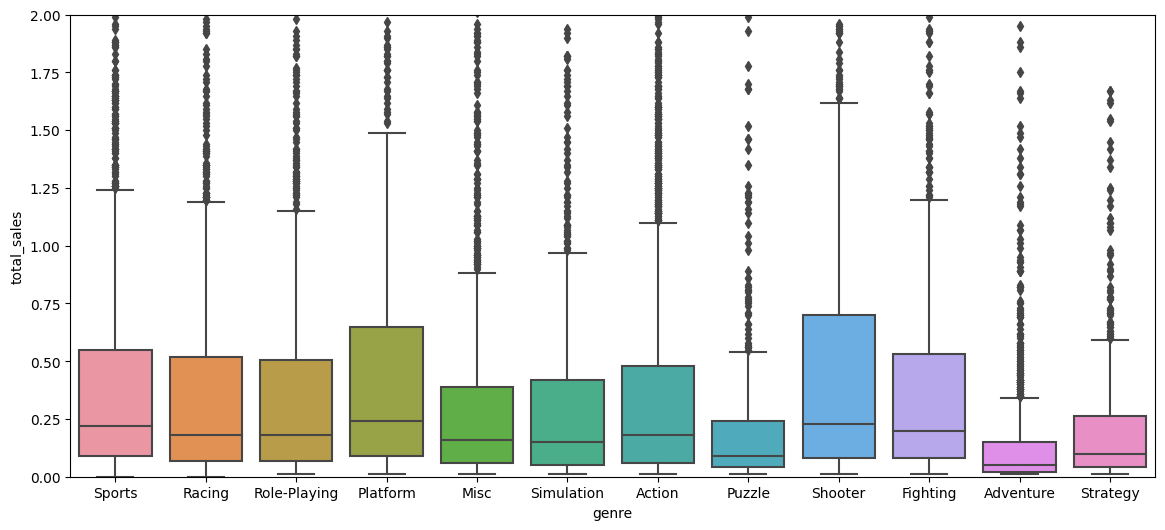

In [50]:
#Echa un vistazo a la distribución general de los juegos por género. 
#¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

plt.figure(figsize= (14,6))
sns.boxplot(data= filtered_games, x= 'genre', y='total_sales')
plt.ylim(0,2)
plt.show()

<span style='color:green'> Realmente no se podría generalizar ya que hay una tendencia entre Sports, Racing, Role-Playing (incluso en los outliers, si se quita la linea de 'plt.ylim(0,2)' se puede visualizar) pero los géneros de juegos más populares fueron de Plataforma y Shooter. Los que menos gustan al publico basado en ventas, son los de Aventura y Puzzle y estos a su vez tienen outliers más </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen analisis, creo que tienes muy buenos insights del los graficos
</div>

# Análisis por región

En las 3 regiones se analizará:
-Las cinco plataformas principales donde sus consumidores juegan más

-Los cinco géneros principales que consume la región y sería bueno realizar el enfoque

-Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

<h3> Análisis de ESRB </h3>

-Este paso va primero para poder diferenciarlo y poder incluirlo en los análisis posteriores.
-En este caso si los juegos en alguna clasificación son muy pocos, se agruparán.

In [51]:
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales
games['rating_new'].value_counts()

E          6853
T          5635
M          1623
E10+       1461
Unknown     761
EC            8
RP            3
K-A           3
AO            1
Name: rating_new, dtype: int64

<span style='color:green'> Este paso lo haré aquí, para que se diferencie de lo demás y lo pueda poner en los gráficos de abajo. Debido a la cantidad almacenada en las primeras 4 clasificaciones, las demás las pondré en una nueva clasificacion llamada 'other', y debido a que el análisis se basa en esta clasificación dejaré fuera las que se consideraron a la hora de rellenar los valores ausentes como 'Unknown' fuera del análisis así como lo que agruparé, ya que solo hacen 15 ventas en total. </span>

In [52]:
games['rating_sorted'] = np.where(
    games['rating_new'].isin(['EC', 'RP', 'K-A', 'AO']),
    'other',
    games['rating_new']
)

games['rating_sorted'].value_counts()

E          6853
T          5635
M          1623
E10+       1461
Unknown     761
other        15
Name: rating_sorted, dtype: int64

In [53]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new,total_sales,user_score_new,sales_category,critic_score_new,sales_category_for_cs,rating_new,rating_sorted
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01,82.54,8.000000,high_sales,76.000000,medium_sales,E,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,35.52,8.300000,high_sales,82.000000,low_sales,E,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01,32.77,8.000000,high_sales,80.000000,low_sales,E,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01,31.38,7.885714,high_sales,88.571429,low_sales,Unknown,Unknown
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006-01-01,29.80,8.500000,high_sales,89.000000,low_sales,E,E


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien, reagrupar es buena estrategia para evitar el ruido, ya que no son estadisticamnete no son significativas por ser tan pequena la muestra
</div>

<h3> Región NA </h3>
-Se agrupará por plataforma 

-Se seleccionan solo el top 5 de plataformas 

-Se realiza el cálculo para saber la cuota de mercado

-Se agrupa y de acuerdo a sus ventas, se tendrá la info para saber los géneros principales para esta region

-Se agrupa por ESRB y se calcula de acuerdo a sus ventas, dejando fuera la clasificación 'Unknown' y 'Other' para dejar más limpio el gráfico

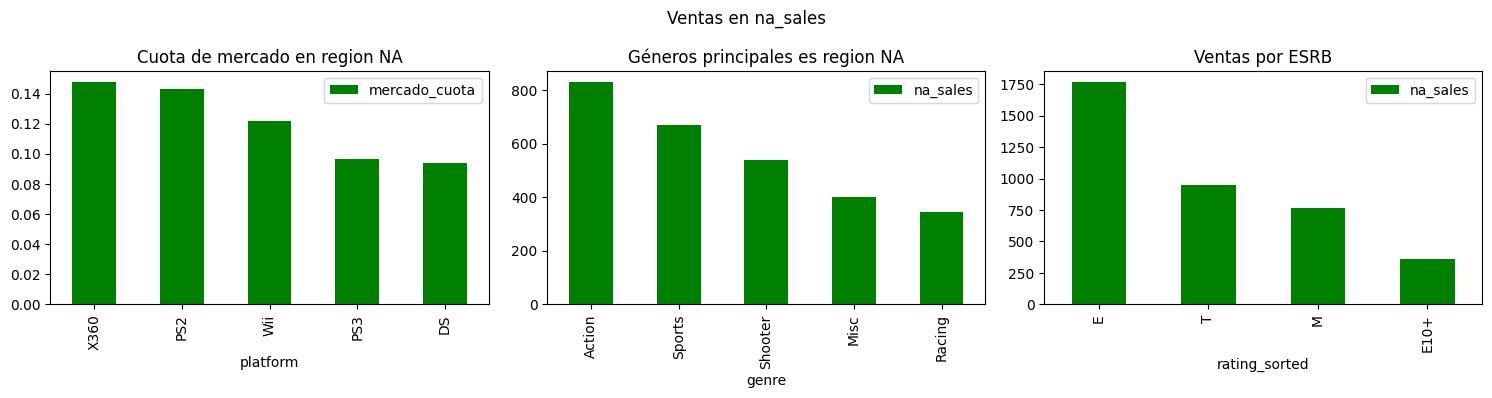

In [54]:
fig, axes = plt.subplots(ncols=3, figsize=(15,4))

region_na = 'na_sales'
sales_by_plat_na = games.groupby('platform')[region_na].sum()
top5_na_plat = sales_by_plat_na.sort_values(ascending=False).head(5).reset_index()
top5_na_plat['mercado_cuota'] = top5_na_plat[region_na] / sales_by_plat_na.sum()


top5_na_genres = games.groupby('genre')[region_na].sum().sort_values(ascending=False).head(5).reset_index()

esrb = games.groupby('rating_sorted')[region_na].sum().sort_values(ascending=False).reset_index()
esrb_filtered =esrb[~esrb['rating_sorted'].isin(['Unknown', 'other'])]

fig.suptitle(f'Ventas en {region_na}', y=0.98)

axes[0].set_title("Cuota de mercado en region NA")
top5_na_plat.plot(kind='bar', x='platform', y='mercado_cuota', color= 'green', ax= axes[0])

axes[1].set_title("Géneros principales es region NA")
top5_na_genres.plot(kind='bar', x='genre', y=region_na, color= 'green', ax= axes[1])

axes[2].set_title("Ventas por ESRB")
esrb_filtered.plot(kind='bar', x='rating_sorted', y=region_na, color= 'green', ax= axes[2])


fig.tight_layout(pad=1)

<h3> Región EU </h3>
-Se agrupará por plataforma 

-Se seleccionan solo el top 5 de plataformas 

-Se realiza el cálculo para saber la cuota de mercado

-Se agrupa y de acuerdo a sus ventas, se tendrá la info para saber los géneros principales para esta region

-Se agrupa por ESRB y se calcula de acuerdo a sus ventas, dejando fuera la clasificación 'Unknown' y 'Other' para dejar más limpio el gráfico

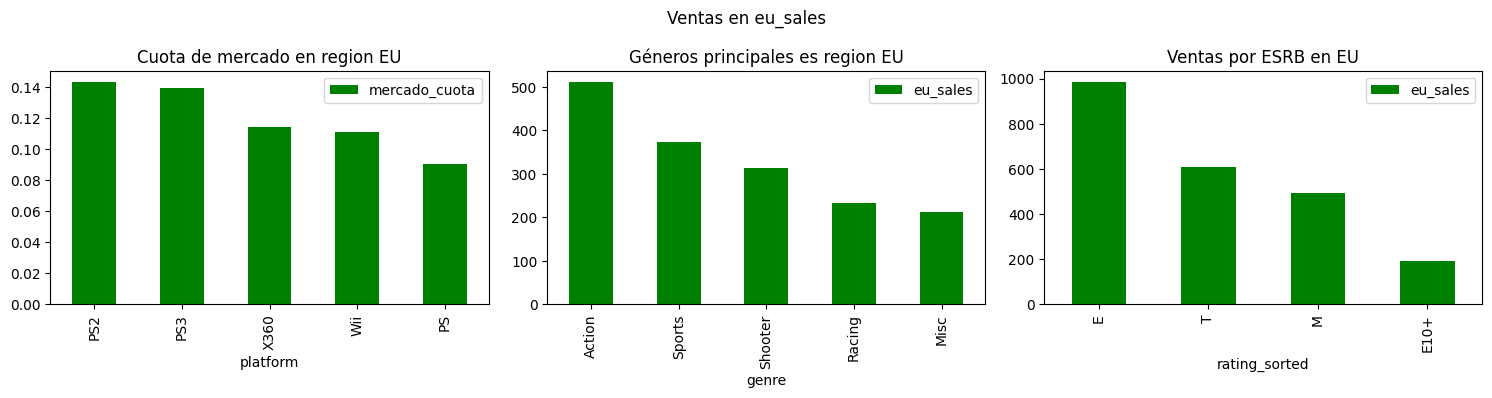

In [55]:
fig, axes = plt.subplots(ncols=3, figsize=(15,4))

region_eu = 'eu_sales'
sales_by_plat_eu = games.groupby('platform')[region_eu].sum()
top5_eu_plat = sales_by_plat_eu.sort_values(ascending=False).head(5).reset_index()
top5_eu_plat['mercado_cuota'] = top5_eu_plat[region_eu] / sales_by_plat_eu.sum()


top5_eu_genres = games.groupby('genre')[region_eu].sum().sort_values(ascending=False).head(5).reset_index()

esrb_eu = games.groupby('rating_sorted')[region_eu].sum().sort_values(ascending=False).reset_index()
esrb_filtered_eu =esrb_eu[~esrb_eu['rating_sorted'].isin(['Unknown', 'other'])]

fig.suptitle(f'Ventas en {region_eu}', y=0.98)

axes[0].set_title("Cuota de mercado en region EU")
top5_eu_plat.plot(kind='bar', x='platform', y='mercado_cuota', color= 'green', ax= axes[0])

axes[1].set_title("Géneros principales es region EU")
top5_eu_genres.plot(kind='bar', x='genre', y=region_eu, color= 'green', ax= axes[1])

axes[2].set_title("Ventas por ESRB en EU")
esrb_filtered_eu.plot(kind='bar', x='rating_sorted', y=region_eu, color= 'green', ax= axes[2])


fig.tight_layout(pad=1)

<h3> Región JP </h3>
-Se agrupará por plataforma 

-Se seleccionan solo el top 5 de plataformas 

-Se realiza el cálculo para saber la cuota de mercado

-Se agrupa y de acuerdo a sus ventas, se tendrá la info para saber los géneros principales para esta region

-Se agrupa por ESRB y se calcula de acuerdo a sus ventas, dejando fuera la clasificación 'Unknown' y 'Other' para dejar más limpio el gráfico

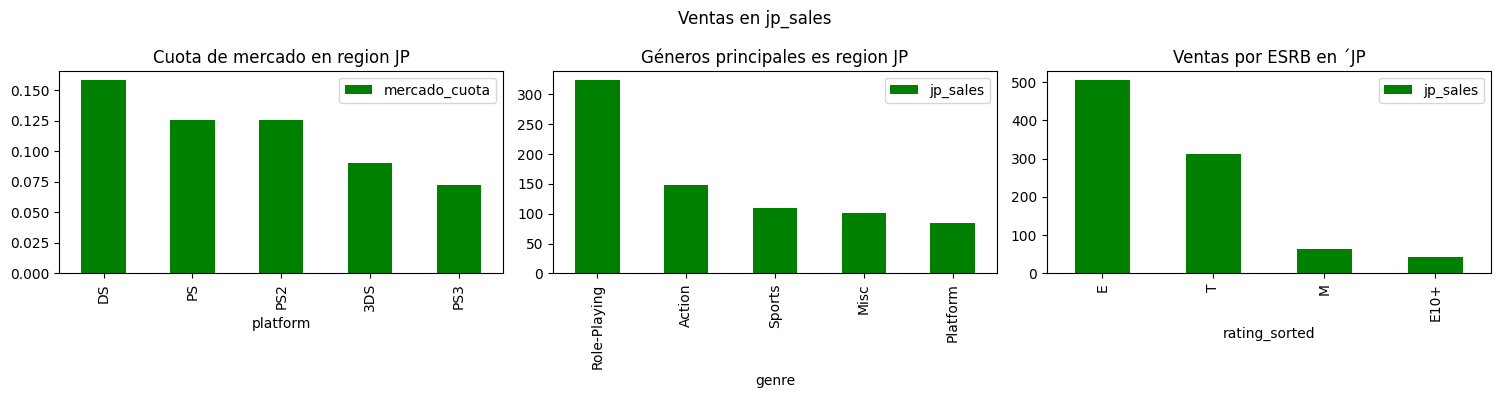

In [56]:
fig, axes = plt.subplots(ncols=3, figsize=(15,4))

region_jp = 'jp_sales'
sales_by_plat_jp = games.groupby('platform')[region_jp].sum()
top5_jp_plat = sales_by_plat_jp.sort_values(ascending=False).head(5).reset_index()
top5_jp_plat['mercado_cuota'] = top5_jp_plat[region_jp] / sales_by_plat_jp.sum()


top5_jp_genres = games.groupby('genre')[region_jp].sum().sort_values(ascending=False).head(5).reset_index()

esrb_jp = games.groupby('rating_sorted')[region_jp].sum().sort_values(ascending=False).reset_index()
esrb_filtered_jp =esrb_jp[~esrb_jp['rating_sorted'].isin(['Unknown', 'other'])]

fig.suptitle(f'Ventas en {region_jp}', y=0.98)

axes[0].set_title("Cuota de mercado en region JP")
top5_jp_plat.plot(kind='bar', x='platform', y='mercado_cuota', color= 'green', ax= axes[0])

axes[1].set_title("Géneros principales es region JP")
top5_jp_genres.plot(kind='bar', x='genre', y=region_jp, color= 'green', ax= axes[1])

axes[2].set_title("Ventas por ESRB en ´JP")
esrb_filtered_jp.plot(kind='bar', x='rating_sorted', y=region_jp, color= 'green', ax= axes[2])


fig.tight_layout(pad=1)

In [57]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_new,total_sales,user_score_new,sales_category,critic_score_new,sales_category_for_cs,rating_new,rating_sorted
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01,82.54,8.000000,high_sales,76.000000,medium_sales,E,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,35.52,8.300000,high_sales,82.000000,low_sales,E,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01,32.77,8.000000,high_sales,80.000000,low_sales,E,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996-01-01,31.38,7.885714,high_sales,88.571429,low_sales,Unknown,Unknown
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006-01-01,29.80,8.500000,high_sales,89.000000,low_sales,E,E


<span style='color:green'>Las cuotas de mercado son muy diferentes en los 3 países, pero el que me llama la atencion personalmente en el de Japon porque los juegos distribuidos se vendieron para plataformas un poco más antiguas, mientras que en la Union Europea y Norte América PS2 y X360 fueron de las más populares. Tambien podemos apreciar que ,Action, Sports y el género Shooter son de lo más populares. Y definitivamente la clasificación de los juegos (ESRB) sí afecta a las ventas ya que entre más se seccione el mercado tiende a vender menosy se puede ver claramente reflejado por ejemplo en la clasificacion 'M' que son para adultos por diversas razones. Aquí lo curioso es que en la clasificación de 'E10+' que contempla los menos de 10-12 años casi no tiene ventas.   </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis Aylin! Asi, es los datos hablan y eso nos ayuda a ver mas alla
</div>

# Hipótesis

Se establecen distintas hipótesis para comprobar si se cumplen

<span style='color:green'> 
    Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
    
Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC, NO son las mismas. </span>

In [58]:
t_stat, p_value = ttest_ind(
    games.query('platform == "XOne"')['user_score_new'],
    games.query('platform == "PC"')['user_score_new'],
   equal_var=False  
)
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")

Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


<span style='color:green'> 
    Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
    
Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes, NO son diferentes.</span>

In [59]:
t_statt, p_valuee = ttest_ind(
    games.query('genre == "Action"')['user_score_new'],
    games.query('genre == "Sports"')['user_score_new'],
    equal_var=False  
)
alphaa = 0.05
if p_valuee < alphaa:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Accion y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio de los usuarios para los géneros de Accion y Deportes son diferentes.")

Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Accion y Deportes son diferentes.


— Cómo formulaste las hipótesis nula y alternativa.


— Qué criterio utilizaste para probar las hipótesis y por qué.

<span style='color:green'> 
    Utilice una prueba T independiente para las calificaciones promedio de los usuarios y ver si el promedio de verdad es diferente y al mismo tiempo establecer el nivel de significancia común en este tipo de pruebas para saber si hay la suficiente para rechazar o aceptar nuestra hipótesis </span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo Aylin estableciendo las hipotesis y las pruebas, lo hiciste de manera correcta y pudimos observar claramente que debido al valor p en ambos casos se rechaza la hipotesis nula. De pronto como mejora podrias considera agregar gráficos de caja o histogramas de las calificaciones de ambas plataformas/generos para proporcionar una visualización adicional que respalde tus resultados estadísticos.
</div>

# Conclusion

<span style='color:green'> Para la campaña del 2017 viendo todos estos resultados, definitivamente mi plan de acción sería el siguiente; el tipo de juegos que sacaría sería de la clasificación 'E' que es de las más vendidas en todas las regiones y son del género Plataforma, pero mi otro target sería el enfocado a juegos con ESRB 'M' ya que los 2 géneros que sus ventas son excelentes son del género Sport o Shooter. Por ventas en general evitaría juegos del género Puzzle. Para el área de marketing recomendaría que los críticos de los juegos emitieran sus críticas días antes ya que las compras a partir de que salen la compra de los usuarios es en base a ellas. Las plataformas en que sacaría primero los juegos sería por el año en curso (2016) es en PS4 que sigue teniendo ventas, en segundo lugar las primeras optimizaciones de los juegos para el X360 y en general optimizaciones a la brevedad para las familias de Xbox y PS.</span>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo Aylin, quiero felicitarte. Sigue asi! Lo unico que necesitariamos para aprobar el proyecto seria lo que te puse en comentario rojo. Aparte de eso, todo lo demas esta muy bien.
</div>

Jhoan! Muchas gracias por las observaciones, que tengas un bonito día!

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Con todo gusto Aylin, igualmente para ti :)! PD: Muy bien con la tabla de contenidos, intro, objetivos y el desarrollo de los pasos. Recuerda que siempre debes pensar en la persona que va a leer tu trabajo para guiarla de la forma mas amigable.
</div>